In [1]:
import pandas as pd
import numpy as np
import itertools
import datetime
import matplotlib.pyplot as plt
from datetime import *
from datetime import datetime, timedelta, date
%load_ext google.colab.data_table
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
project_id = "perceptive-ivy-290216"

# Standard plotly imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [4]:
query2=f"""
SELECT
A.Year,
A.GP,
A.Driver,
A.DriverNumber,
A.Team,
CAST(A.Position AS INT64) Position,
Status,
A.LapStartTime,
A.Time LapEndTime,
B.Time as LapInstant,
A.LapTime,
CAST(LapNumber as INT64) LapNumber,
RPM,
Speed,
nGear,
Throttle,
DRS,
Distance,
RelativeDistance,
DriverAhead,
DistanceToDriverAhead,
X,
Y,
Z,
CAST(Stint as INT64) Stint,
PitOutTime,
PitInTime,
Sector1Time,
Sector2Time,
Sector3Time,
Sector1SessionTime,
Sector2SessionTime,
Sector3SessionTime,
CAST(SpeedI1 AS INT64) SpeedI1,
CAST(SpeedI2 AS INT64) SpeedI2,
CAST(SpeedFL AS INT64) SpeedFL,
CAST(SpeedST AS INT64) SpeedST,
Compound,
CAST(TyreLife AS INT64) TyreLife,
FreshTyre,
TrackStatus,
Deleted,
DeletedReason
FROM `perceptive-ivy-290216.f1_api.qualyfing_lap_time`  A
INNER JOIN
`perceptive-ivy-290216.f1_api.qualifying_telemetry_2021` B
ON B.SessionTime>=A.LapStartTime AND B.SessionTime<=A.Time
AND A.Driver=B.Driver
AND A.Year=B.Year
AND A.GP=B.GP
WHERE A.Year=2021
AND A.GP="Austrian Grand Prix"
# AND A.DRIVER='HAM'
AND B.Year=2021
AND B.GP="Austrian Grand Prix"
# AND B.Driver='HAM'
ORDER BY LapNumber, LapStartTime, LapInstant
"""
track2=pd.read_gbq(query2,project_id,dialect='standard')

In [12]:
track2.tail()

,Year,GP,Driver,DriverNumber,Team,Position,Status,LapStartTime,LapEndTime,LapInstant,LapTime,LapNumber,RPM,Speed,nGear,Throttle,DRS,Distance,RelativeDistance,DriverAhead,DistanceToDriverAhead,X,Y,Z,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,Compound,TyreLife,FreshTyre,TrackStatus,Deleted,DeletedReason
434735,2021,Austrian Grand Prix,PER,11,Red Bull Racing,<NA>,OnTrack,0 days 01:14:48.124000,0 days 01:16:26.699000,0 days 00:57:31.379000,0 days 00:01:38.575000,23,4240,47,1,0,8,98266.543305,0.999941,,10.676944,1301,-1154,7215,7,NaT,NaT,0 days 00:00:24.574000,0 days 00:00:37.175000,0 days 00:00:36.826000,0 days 01:15:12.698000,0 days 01:15:49.873000,0 days 01:16:26.699000,220,207,53,236,SOFT,3,True,1,False,
434736,2021,Austrian Grand Prix,PER,11,Red Bull Racing,<NA>,OnTrack,0 days 01:14:48.124000,0 days 01:16:26.699000,0 days 00:57:31.380000,0 days 00:01:38.575000,23,3689,47,0,0,8,98266.556111,0.999941,,10.676944,1300,-1154,7214,7,NaT,NaT,0 days 00:00:24.574000,0 days 00:00:37.175000,0 days 00:00:36.826000,0 days 01:15:12.698000,0 days 01:15:49.873000,0 days 01:16:26.699000,220,207,53,236,SOFT,3,True,1,False,
434737,2021,Austrian Grand Prix,PER,11,Red Bull Racing,<NA>,OnTrack,0 days 01:14:48.124000,0 days 01:16:26.699000,0 days 00:57:31.599000,0 days 00:01:38.575000,23,3504,46,0,0,8,98269.301071,0.999969,,10.676944,1274,-1161,7215,7,NaT,NaT,0 days 00:00:24.574000,0 days 00:00:37.175000,0 days 00:00:36.826000,0 days 01:15:12.698000,0 days 01:15:49.873000,0 days 01:16:26.699000,220,207,53,236,SOFT,3,True,1,False,
434738,2021,Austrian Grand Prix,PER,11,Red Bull Racing,<NA>,OnTrack,0 days 01:14:48.124000,0 days 01:16:26.699000,0 days 00:57:31.620000,0 days 00:01:38.575000,23,3320,45,0,0,8,98269.556111,0.999972,,10.676944,1271,-1161,7215,7,NaT,NaT,0 days 00:00:24.574000,0 days 00:00:37.175000,0 days 00:00:36.826000,0 days 01:15:12.698000,0 days 01:15:49.873000,0 days 01:16:26.699000,220,207,53,236,SOFT,3,True,1,False,
434739,2021,Austrian Grand Prix,PER,11,Red Bull Racing,<NA>,OnTrack,0 days 01:14:48.124000,0 days 01:16:26.699000,0 days 00:57:31.752000,0 days 00:01:38.575000,23,3320,44,0,0,8,98271.122219,0.999987,,10.676944,1256,-1165,7215,7,NaT,NaT,0 days 00:00:24.574000,0 days 00:00:37.175000,0 days 00:00:36.826000,0 days 01:15:12.698000,0 days 01:15:49.873000,0 days 01:16:26.699000,220,207,53,236,SOFT,3,True,1,False,


In [9]:
Drivers=(track2['Driver'].unique())
Drivers

array(['MAZ', 'MSC', 'STR', 'GAS', 'VET', 'GIO', 'RAI', 'TSU', 'NOR',
       'VER', 'LEC', 'SAI', 'PER', 'RIC', 'HAM', 'BOT', 'RUS', 'OCO',
       'LAT', 'ALO'], dtype=object)

In [10]:
Lap_Driver=pd.DataFrame(track2.groupby(by=["Driver"])["LapTime"].unique().explode())
Lap_Driver.sort_values(by=["Driver","LapTime"])

,LapTime
Driver,
ALO,0 days 00:01:04.472000
ALO,0 days 00:01:04.856000
ALO,0 days 00:01:04.970000
ALO,0 days 00:01:23.701000
ALO,0 days 00:01:30.569000
ALO,0 days 00:01:34.837000
ALO,NaT
BOT,0 days 00:01:04.049000
BOT,0 days 00:01:04.282000


In [11]:
Lap_Driver.sort_values(by=["LapTime"])

,LapTime
Driver,
VER,0 days 00:01:03.720000
VER,0 days 00:01:03.766000
NOR,0 days 00:01:03.768000
VER,0 days 00:01:03.927000
NOR,0 days 00:01:03.958000
PER,0 days 00:01:03.990000
HAM,0 days 00:01:04.014000
BOT,0 days 00:01:04.049000
GAS,0 days 00:01:04.107000


In [78]:
track_fastest=track2[track2["LapTime"]=="0 days 00:01:03.720000"]
# track_fastest["nGear"]=track_fastest["nGear"].astype(str)
x = np.array(track_fastest['X'].values)
y = np.array(track_fastest['Y'].values)

In [91]:
fig=px.scatter(data_frame=track_fastest.sort_values("LapInstant"), x="X", y="Y",
           color="nGear",
           hover_name="Driver",
           height=800, width=1200,
           color_discrete_sequence=px.colors.qualitative.Antique,
           title="Gear Change For GP")

fig.update_layout(
    xaxis_title="X",
    yaxis_title="Y",
)
fig.update_traces(marker={'size': 10})

fig.show()

In [89]:
fig=px.scatter(data_frame=track_fastest.sort_values("LapInstant"), x="X", y="Y",
           color="Speed", hover_name="Driver",
           height=700, width=1100,
           title="Speed Changes")

fig.update_layout(
    xaxis_title="X",
    yaxis_title="Y",
)

fig.update_traces(marker={'size': 10})

fig.show()

In [38]:
from matplotlib.collections import LineCollection
from matplotlib import cm

x = np.array(track_fastest['X'].values)
y = np.array(track_fastest['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = track_fastest['nGear'].to_numpy().astype(float)

cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

<ipython-input-38-9b1445068a34>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [80]:
lc_comp.set_array(gear)

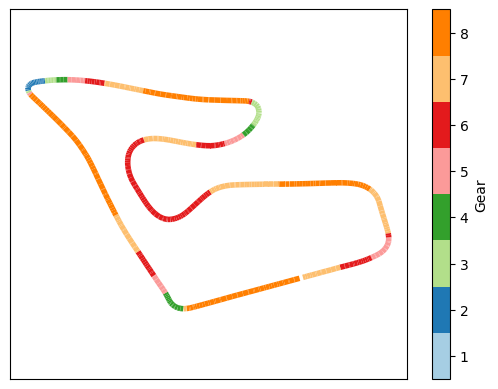

In [39]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# title = plt.suptitle(
    # f"Fastest Lap Gear Shift Visualization\n"
    # f"{track_fastest['Driver']} - {track_fastest['GP']} {track_fastest.Year}"
# )
